## **Dataset 3:** 10VNfoods

# **XÂY DỰNG MÔ HÌNH**

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array, to_categorical

folder = '/content/drive/MyDrive/AI_dataset_10VNfoods/train_set/'
photos, labels = list(), list()

for file in listdir(folder):
    output = 0
    if file.startswith('bunbohue'):       # bún bò huế
        output = 1
    if file.startswith('banhxeo'):        # bánh xèo
        output = 2
    if file.startswith('banhmi'):         # bánh mì
        output = 3
    if file.startswith('comtam'):         # cơm tấm
        output = 4
    if file.startswith('bunthitnuong'):   # bún thịt nướng
        output = 5
    if file.startswith('chedauden'):      # chè đậu đen
        output = 6
    if file.startswith('banhtrungthu'):   # bánh trung thu
        output = 7
    if file.startswith('banhchung'):      # bánh chưng
        output = 8
    if file.startswith('xoigac'):         # xôi gấc
        output = 9
    if file.startswith('thitga'):         # thịt gà luộc
        output = 10
    

    photo = load_img(folder+file,target_size=(30,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos) 
labels = asarray(labels) 
labels = to_categorical(labels)  # one-hot encode the labels
print('X size:', photos.shape,'\ny size:' , labels.shape)
save('x_train_imgs.npy',photos)
save('y_train_labels.npy',labels)

X size: (1400, 30, 30, 3) 
y size: (1400, 11)


In [ ]:
import numpy as np
x_train = np.load('x_train_imgs.npy')
y_train = np.load('y_train_labels.npy')
x_train = x_train.reshape(1400, 30, 30, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape, y_train.shape)

(1400, 30, 30, 3) (1400, 11)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(11,activation='softmax'))

from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=30,verbose=1)
model.summary()

Epoch 1/30
22/22 [==============================] - 10s 24ms/step - loss: 2.2716 - accuracy: 0.1564
Epoch 2/30
22/22 [==============================] - 0s 9ms/step - loss: 1.8265 - accuracy: 0.3179
Epoch 3/30
22/22 [==============================] - 0s 9ms/step - loss: 1.5925 - accuracy: 0.4286
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 1.4339 - accuracy: 0.4857
Epoch 5/30
22/22 [==============================] - 0s 9ms/step - loss: 1.3531 - accuracy: 0.5000
Epoch 6/30
22/22 [==============================] - 0s 9ms/step - loss: 1.2540 - accuracy: 0.5493
Epoch 7/30
22/22 [==============================] - 0s 8ms/step - loss: 1.1657 - accuracy: 0.5793
Epoch 8/30
22/22 [==============================] - 0s 8ms/step - loss: 1.1444 - accuracy: 0.6014
Epoch 9/30
22/22 [==============================] - 0s 9ms/step - loss: 1.0355 - accuracy: 0.6257
Epoch 10/30
22/22 [==============================] - 0s 9ms/step - loss: 0.9864 - accuracy: 0.6486
Epoch 11/30
22/22

# **TÍNH TOÁN ĐỘ CHÍNH XÁC**

In [ ]:
import numpy as np
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array, to_categorical


folder = '/content/drive/MyDrive/AI_dataset_10VNfoods/train_set/'
photos, labels = list(), list()

for file in listdir(folder):
    output = 0
    if file.startswith('bunbohue'):       # bún bò huế
        output = 1
    if file.startswith('banhxeo'):        # bánh xèo
        output = 2
    if file.startswith('banhmi'):         # bánh mì
        output = 3
    if file.startswith('comtam'):         # cơm tấm
        output = 4
    if file.startswith('bunthitnuong'):   # bún thịt nướng
        output = 5
    if file.startswith('chedauden'):      # chè đậu đen
        output = 6
    if file.startswith('banhtrungthu'):   # bánh trung thu
        output = 7
    if file.startswith('banhchung'):      # bánh chưng
        output = 8
    if file.startswith('xoigac'):         # xôi gấc
        output = 9
    if file.startswith('thitga'):         # thịt gà luộc
        output = 10

    photo = load_img(folder+file,target_size=(30,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos) 
labels = asarray(labels) 
labels = to_categorical(labels) 
print('X size:', photos.shape,'\ny size:' , labels.shape)

save('test_imgs.npy',photos)
save('test_labels.npy',labels)

x_test = np.load('test_imgs.npy')
y_test = np.load('test_labels.npy')
x_test = x_test.reshape(1400, 30, 30, 3)
x_test = x_test.astype('float32')/255
print(x_test.shape, y_test.shape)

X size: (61, 30, 30, 3) 
y size: (61, 9)
(61, 30, 30, 3) (61, 9)


In [ ]:
loss,acc = model.evaluate(x_test, y_test)
print('accuracy:', acc, '\nloss:', loss)

InvalidArgumentError: ignored

In [ ]:
model.save('model_10VNfoods_75acc.h5')

# **DỰ ĐOÁN 10 ẢNH CÓ SẴN TRONG TỆP KIỂM TRA (TEST_SET)**

available options: banhmi, bunbohue, banhxeo, comtam, bunthitnuong,
chedauden, banhtrungthu, banhchung, xoigac, thitga

what do you want to predict from test_set: banhchung
1/1 [==============================] - 0s 30ms/step
Predicted label: banh chung
1/1 [==============================] - 0s 31ms/step
Predicted label: banh chung
1/1 [==============================] - 0s 32ms/step
Predicted label: banh chung
1/1 [==============================] - 0s 28ms/step
Predicted label: banh chung
1/1 [==============================] - 0s 39ms/step
Predicted label: banh chung
1/1 [==============================] - 0s 31ms/step
Predicted label: bun thit nuong
1/1 [==============================] - 0s 32ms/step
Predicted label: banh chung
1/1 [==============================] - 0s 32ms/step
Predicted label: banh chung
1/1 [==============================] - 0s 34ms/step
Predicted label: banh chung
1/1 [==============================] - 0s 32ms/step
Predicted label: banh chung


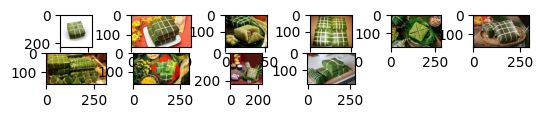

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/AI_dataset_10VNfoods/test_set/'

my_dict = {1:'bun bo hue', 2:'banh xeo', 3:'banh mi', 4:'com tam', 5:'bun thit nuong',
           6:'che dau den', 7:'banh trung thu', 8:'banh chung', 9:'xoi gac', 10:'thit ga'}

print('available options: banhmi, bunbohue, banhxeo, comtam, bunthitnuong,\nchedauden, banhtrungthu, banhchung, xoigac, thitga\n')
input_ = input("what do you want to predict from test_set: ")

for i in range(10):
  plt.subplot(10,6,i+1)
  filename = folder + input_ + ' (' + str(i+1) + ').jpg'
  img = imread(filename)
  plt.imshow(img)
  # Load the image and convert it to a numpy array
  img = load_img(filename, target_size=(30, 30))
  img_arr = img_to_array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  # Perform prediction on the image
  prediction = model.predict(img_arr)
  # Get the label with the highest probability
  label = np.argmax(prediction)
  print('Predicted label:', my_dict[label])
plt.show()

# **DỰ ĐOÁN ẢNH BẰNG ẢNH NGOÀI TỰ TẢI LÊN**

1/1 [==============================] - 0s 75ms/step
Predicted label: thit ga
1/1 [==============================] - 0s 17ms/step
Predicted label: banh mi
1/1 [==============================] - 0s 17ms/step
Predicted label: xoi gac
1/1 [==============================] - 0s 18ms/step
Predicted label: banh xeo


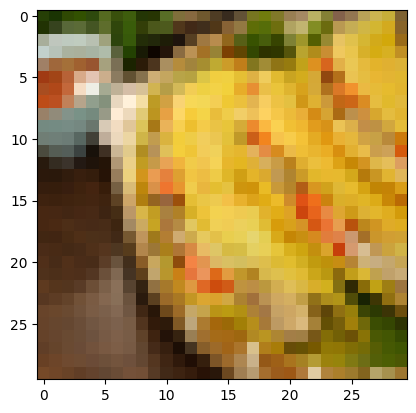

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

my_dict = {1:'bun bo hue', 2:'banh xeo', 3:'banh mi', 4:'com tam', 5:'bun thit nuong',
           6:'che dau den', 7:'banh trung thu', 8:'banh chung', 9:'xoi gac', 10:'thit ga'}

uploaded_imgs = ['thitga.jpg',
                 'banhmi.jpg',
                 'xoigac.jpg',
                 'banhxeo.jpg']

for image in uploaded_imgs:
  # Load the image
  img = Image.open(image).convert('RGB')
  # convert it to a numpy array
  img = img.resize((30,30))
  img_arr = np.array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
  # print uploaded image
  plt.imshow(img)
  # Perform prediction on the image
  prediction = model.predict(img_arr)
  # Get the label with the highest probability
  label = np.argmax(prediction)
  print('Predicted label:', my_dict[label])